### Thank you for visting my code. If there is anything missing or wrong, please feel free to inform me. Also like my page on fb: https://www.facebook.com/codemakerz


#### Stay tuned for the more updates in the same notebook.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
# LIKE US ON FB: https://www.facebook.com/codemakerz
# Any results you write to the current directory are saved as output.

['googleplaystore_user_reviews.csv', 'license.txt', 'googleplaystore.csv']


In [2]:
# load data
df = pd.read_csv("../input/googleplaystore.csv", encoding='utf-8')

In [3]:
# So we got our dataset
df.head() 
# Here in our dataset we can see Result = 0, 1 that mean 1 mean selected celebrity has cancer and 0 means no cancer

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# so before visualization lets do some EDA. Exploratory data analysis.

In [5]:
# Lets find is there any missing values?
df.isnull().sum() # We can see in Rating we have 1474 missing values & 1 value in Type, 1 in content rating and others also

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# Lets see the all columns names
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# Find the datatype of all the columns 
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
# total number of records in dataset
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [9]:
# Summary statistics. It will show you the summary statistic for all the numerical values
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
# info is also used to see some important statistics for dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
# This will show you top 5 Name columns. As head return top 5
df.App.head()

0       Photo Editor & Candy Camera & Grid & ScrapBook
1                                  Coloring book moana
2    U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                Sketch - Draw & Paint
4                Pixel Draw - Number Art Coloring Book
Name: App, dtype: object

In [12]:
# you can also do above same thing with array type
df[["App"]].head()

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book


In [13]:
# show multiple columns
df[["App", "Rating"]].head()

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3


In [14]:
# you can also watch below 5 using tail
df[["App", "Rating"]].tail()

,App,Rating
10836,Sya9a Maroc - FR,4.5
10837,Fr. Mike Schmitz Audio Teachings,5.0
10838,Parkinson Exercices FR,NaN
10839,The SCP Foundation DB fr nn5n,4.5
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5


In [15]:
# Basic statistics
print("Mean Age: ", df.Rating.mean())
print("Median Age: ", df.Rating.median())
print("Variance Age: ", df.Rating.var())
print("Standard Deviation Age: ", df.Rating.std())
print("25th Percentile of Age: ", df.Rating.quantile(.25))
print("50th Percentile of Age: ", df.Rating.quantile(.5))
print("75th Percentile of Age: ", df.Rating.quantile(.75))

Mean Age:  4.193338315362448
Median Age:  4.3
Variance Age:  0.28883240560309886
Standard Deviation Age:  0.5374313031477594
25th Percentile of Age:  4.0
50th Percentile of Age:  4.3
75th Percentile of Age:  4.5


In [16]:
# position based indexing
# We use iloc for this. Here we mention [row, cols] like this.
# : as row means all the rows & 1:4 as columns means 1st index(2nd columns aqs index start from 0), 3rd column and 4th column. 4th index will not included/
df.iloc[:, 1:4].head()

,Category,Rating,Reviews
0,ART_AND_DESIGN,4.1,159
1,ART_AND_DESIGN,3.9,967
2,ART_AND_DESIGN,4.7,87510
3,ART_AND_DESIGN,4.5,215644
4,ART_AND_DESIGN,4.3,967


In [17]:
# name based indexing
# in below example we are using all the rows(:) and only Name and Age column.
# you can use any indexing method but i usually prefer iloc. As i am more comfortable with indices.
df.loc[:,["App", "Rating"]].head()

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3


In [18]:
# lets find out different type of Type column
df.Type.value_counts()
# we can see the number of free and paid apps

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

##### Lets plot Some visualizations

##### We will start with Univariate Distribution

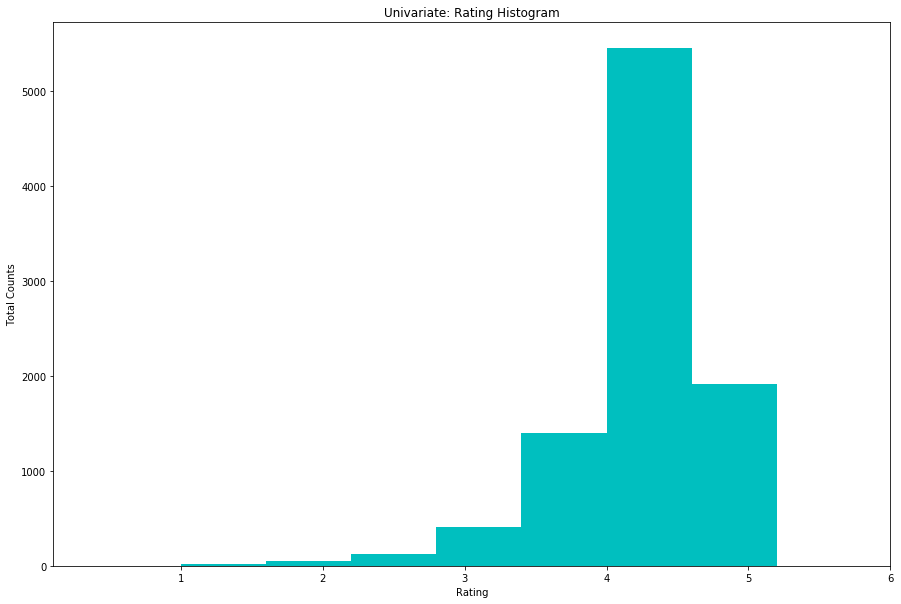

In [19]:
# Plot Univariate distribution for Ratings using histogram. It will show the total number or app according to the ratings.
# Total number of app acccording to  the ratings
plt.figure(figsize= (15, 10));
#plt.hist(x=df.Rating, color='c');
df.Rating.plot(kind="hist", bins=30, color='c')
plt.title("Univariate: Rating Histogram");
plt.xlabel("Rating");
plt.ylabel("Total Counts");
plt.xlim(right=6)
plt.plot();

In [20]:
# lets see how many categories are there and total number of apps grouped by category
df.Category.value_counts()
# So it clearly show the count of apps for a particular category. value_counts() is very handly function for this.

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

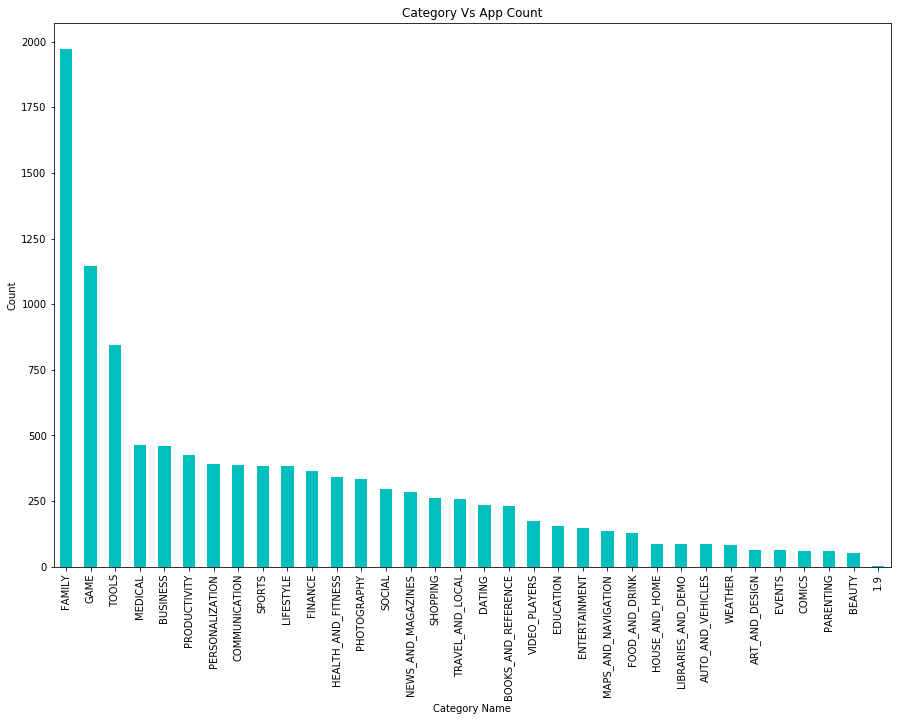

In [21]:
# but really saying this data is not convincing... we can make it more appealing by plotting it.
# lets plot it.
plt.figure(figsize=(15,10))
df.Category.value_counts().plot(kind="bar", rot=0, title="Pclass Vs Count", color='c', );
plt.xticks(rotation='vertical');
plt.title("Category Vs App Count")
plt.xlabel("Category Name")
plt.ylabel("Count")
plt.plot();

In [22]:
# So now from above example we can see that mostly apps belongs to the family, games , tool category.
# and beauty categroy app is least in number.

In [23]:
# Lets plot the average rating of eah category.
df.groupby(["Category"]).Rating.mean()
# We can see 1.9 category has a rating of 19.0.. which is not possible as our rating is out of 5.
# So definitly it may be some data issue. Now what to do?

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [24]:
df[df["Category"] == '1.9'] # We can see Rating has a value of 19.0, which is not possible.
# So we have two choices:
# 1. Either we remove this row
# 2. Correct this value.
# i will not prefer removing row as it is the only row related to the category 1.9.
# lets replace this value with average rating.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [25]:
# inplace will save your change to the original dataframe
df["Rating"].replace(19.0, df.Rating.mean(), inplace=True)

In [26]:
# now lets check again
df[df["Category"] == '1.9'] # So we have finally replaced it to the average value

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.193338,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [27]:
df.groupby(["Category"]).Rating.mean() # So we can see now average values are correct for all categries

Category
1.9                    4.193338
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411

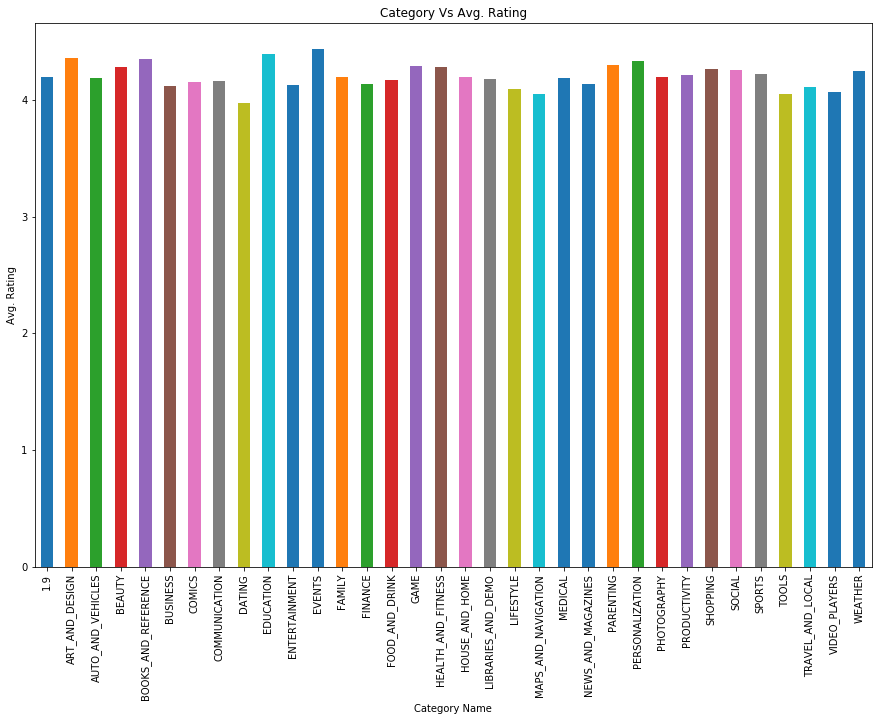

In [28]:
plt.figure(figsize=(15,10))
df.groupby(["Category"]).Rating.mean().plot(kind="bar", rot=0, title="Pclass Vs Count");
plt.xticks(rotation='vertical');
plt.xlabel("Category Name")
plt.ylabel("Avg. Rating")
plt.title("Category Vs Avg. Rating")
plt.plot();

In [29]:
# so now we can see the average rating. As per our data average rating is almost same for all so bars are almost equal.

In [30]:
df.groupby(["Category", "Installs"]).Rating.mean()

Category           Installs      
1.9                Free              4.193338
ART_AND_DESIGN     0+                     NaN
                   1,000+            4.366667
                   1,000,000+        4.325000
                   10,000+           4.445455
                   10,000,000+       4.460000
                   100+              5.000000
                   100,000+          4.211111
                   5,000+            4.375000
                   5,000,000+        4.366667
                   50,000+           4.333333
                   50,000,000+       4.500000
                   500,000+          4.450000
AUTO_AND_VEHICLES  1+                     NaN
                   1,000+            3.800000
                   1,000,000+        4.361538
                   10+                    NaN
                   10,000+           4.333333
                   10,000,000+       4.300000
                   100+              3.500000
                   100,000+          4.291304


In [31]:
# Lets find out how many apps are paid or free.
df.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

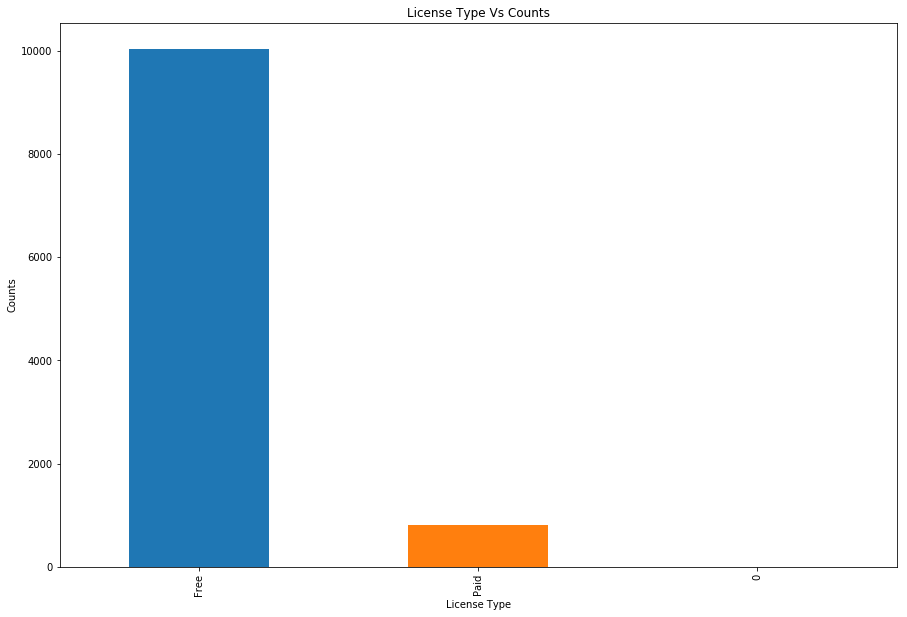

In [32]:
plt.figure(figsize=(15, 10));
df.Type.value_counts().plot(kind="bar");
plt.xlabel("License Type");
plt.ylabel("Counts")
plt.title("License Type Vs Counts")
plt.plot();

In [33]:
#So from our above diagrame we can see we have huge number of free apps.

In [34]:
# Lets try to find out the content rating.. that mean how many adult apps are there or how many non-adult apps.
df.columns # it will select content rating column


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [35]:
df['Content Rating'].value_counts() # you can see we have 6 categories in content rating.

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

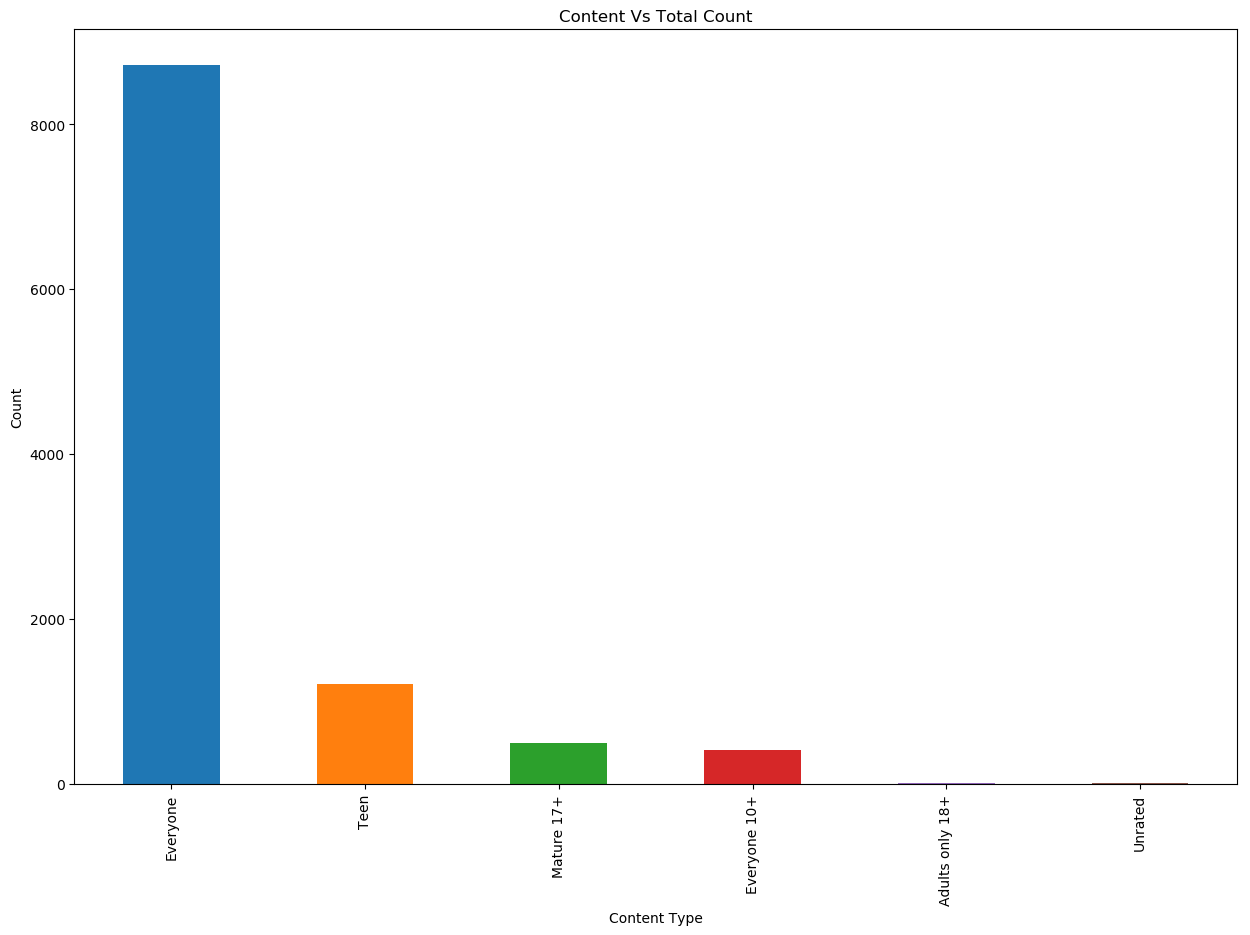

In [36]:
plt.figure(figsize=(15, 10), dpi=100, );
df["Content Rating"].value_counts().plot(kind="bar");
plt.title("Content Vs Total Count");
plt.xlabel("Content Type");
plt.ylabel("Count");
plt.ylim(bottom=-10);
plt.plot();

In [37]:
# Actually you can see last two bars are almost hidden because the value is very less.

In [38]:
# now lets see apps grouped by os version 
df["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [39]:
df[df["Android Ver"] == '1.0 and up'] # we can verify the above data by using this command. You can
# simply replace the value of OS and get the number.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8919,Bible du Semeur-BDS (French),BOOKS_AND_REFERENCE,4.5,313,6.9M,"50,000+",Free,0,Everyone,Books & Reference,"August 4, 2018",0.7,1.0 and up
9212,Tamilnadu Electricity Info,TOOLS,3.6,216,811k,"10,000+",Free,0,Everyone,Tools,"November 9, 2014",2.0,1.0 and up


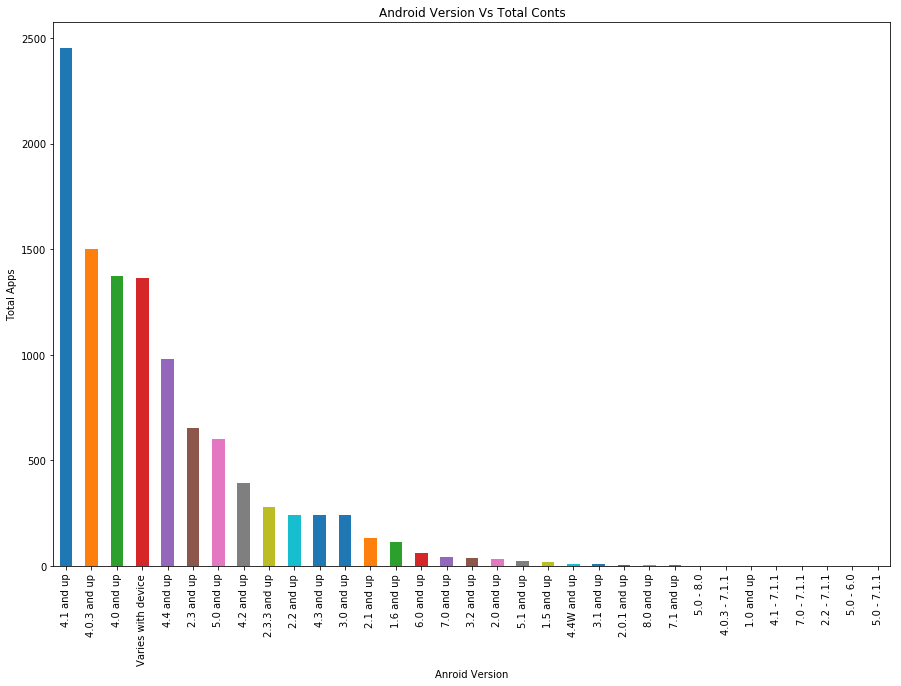

In [40]:
plt.figure(figsize=(15, 10));
plt.xlabel("Anroid Version");
plt.ylabel("Total Apps");
plt.title("Android Version Vs Total Conts");
df["Android Ver"].value_counts().plot(kind="bar");
plt.plot();

In [41]:
df["Android Ver"].value_counts(normalize=True) # You can get the percentage

4.1 and up            0.226149
4.0.3 and up          0.138494
4.0 and up            0.126868
Varies with device    0.125669
4.4 and up            0.090423
2.3 and up            0.060159
5.0 and up            0.055453
4.2 and up            0.036354
2.3.3 and up          0.025927
2.2 and up            0.022513
4.3 and up            0.022421
3.0 and up            0.022237
2.1 and up            0.012364
1.6 and up            0.010703
6.0 and up            0.005536
7.0 and up            0.003875
3.2 and up            0.003322
2.0 and up            0.002953
5.1 and up            0.002214
1.5 and up            0.001845
4.4W and up           0.001107
3.1 and up            0.000923
2.0.1 and up          0.000646
8.0 and up            0.000554
7.1 and up            0.000277
5.0 - 8.0             0.000185
4.0.3 - 7.1.1         0.000185
1.0 and up            0.000185
4.1 - 7.1.1           0.000092
7.0 - 7.1.1           0.000092
2.2 - 7.1.1           0.000092
5.0 - 6.0             0.000092
5.0 - 7.

In [42]:
df["Genres"].value_counts() # here can find all the genres.. Try its plot yourself

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

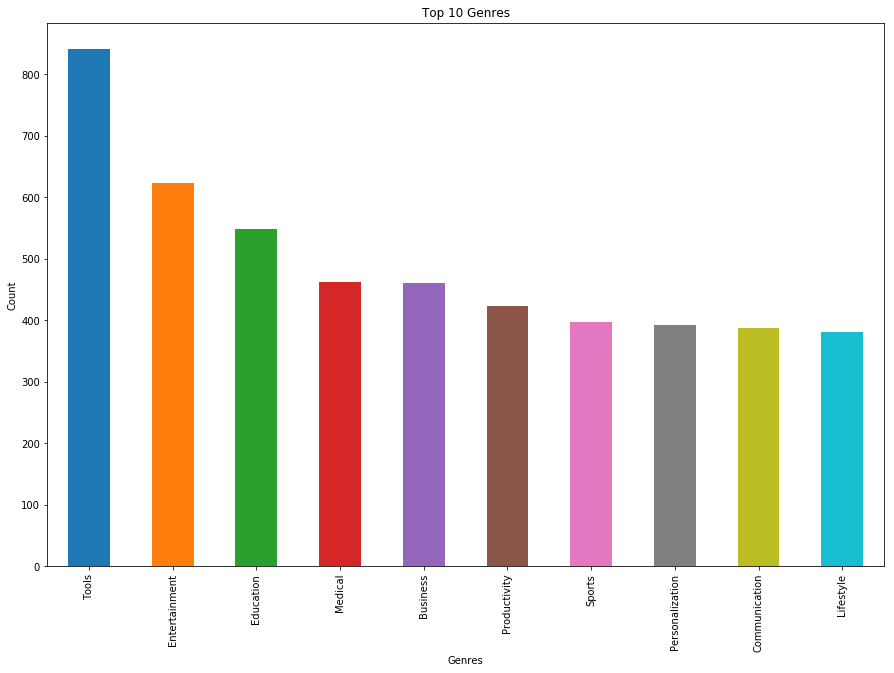

In [43]:
# Lets plot top 10 genres
plt.figure(figsize=(15, 10));
df["Genres"].value_counts().head(10).plot(kind="bar");
#df.groupby(["Genres"])..head(10).plot(kind="bar");
plt.title("Top 10 Genres");
plt.xlabel("Genres");
plt.ylabel("Count");
plt.plot();

In [44]:
# you can verify using below statement.
# So found the genre wise installs
df[df["Genres"] == 'Video Players & Editors;Music & Video']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3702,Cartoon Network App,VIDEO_PLAYERS,4.0,119202,Varies with device,"10,000,000+",Free,0,Everyone 10+,Video Players & Editors;Music & Video,"June 21, 2018",Varies with device,Varies with device
5861,Masha and The Bear,FAMILY,4.0,39779,19M,"5,000,000+",Free,0,Everyone,Video Players & Editors;Music & Video,"August 5, 2016",4.0.1,4.0.3 and up
7582,Cartoon Network App,FAMILY,4.0,119173,Varies with device,"10,000,000+",Free,0,Everyone 10+,Video Players & Editors;Music & Video,"June 21, 2018",Varies with device,Varies with device


In [45]:
# We need to change the dtype of review but there is one column whih contains 3.0M
df.Reviews.replace("3.0M", '3000000', inplace=True)
df[df.Reviews == "3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [46]:
df.Reviews = df.Reviews.astype("float") # lets change the datatype of Ratings

In [47]:

df_new = df.groupby(["Genres", "Category"], as_index=False).sum()[["Genres", "Category", "Reviews"]].sort_values(by="Reviews", ascending=False).head(10)


In [48]:
df_new

,Genres,Category,Reviews
46,Communication,COMMUNICATION,815462260.0
128,Social,SOCIAL,621241422.0
0,Action,GAME,350303953.0
8,Arcade,GAME,336990433.0
33,Casual,GAME,308028000.0
137,Tools,TOOLS,272842708.0
133,Strategy,GAME,230117074.0
103,Photography,PHOTOGRAPHY,213516650.0
129,Sports,GAME,122047448.0
120,Shopping,SHOPPING,115041222.0


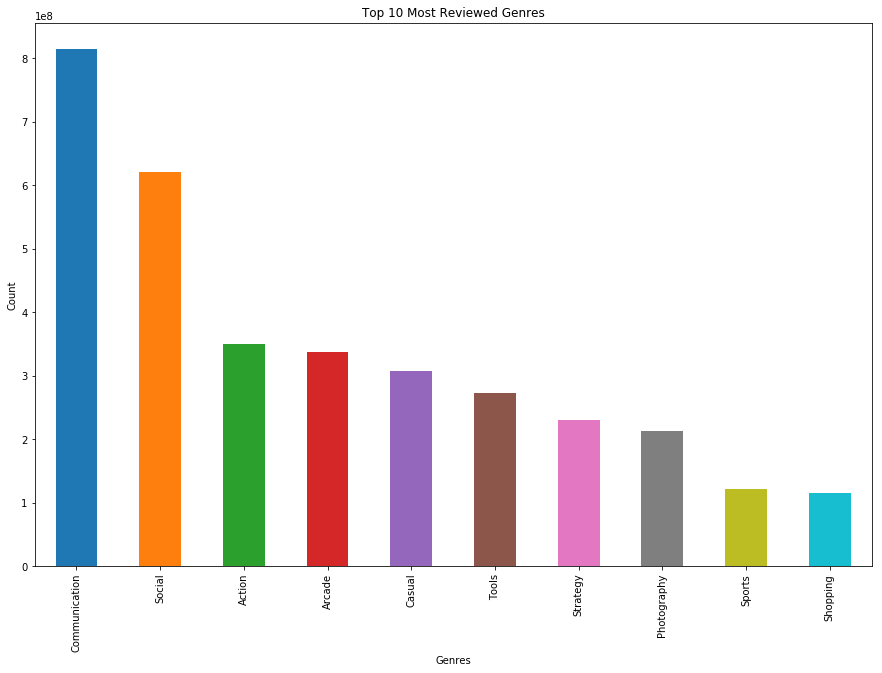

In [49]:
# Below diagram shows the ;top 10 famous genres as per there review counts
plt.figure(figsize=(15, 10));
plt.title("Top 10 Most Reviewed Genres");
plt.xlabel("Genres");
plt.ylabel("Count");
df_new.groupby("Genres").Reviews.sum().sort_values(ascending=False).plot(kind='bar');
plt.plot();

### Thank you for visting my code. If there is anything missing or wrong, please feel free to inform me. Also like my page on fb: https://www.facebook.com/codemakerz